### Demographic data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

In [11]:
gatrain = pd.read_csv('./data/gender_age_train.csv');
gatest = pd.read_csv('./data/gender_age_test.csv');
print(gatrain.head(3))
print(gatrain.describe())
print(gatest.head(3))

             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
          device_id           age
count  7.464500e+04  74645.000000
mean  -7.491354e+14     31.410342
std    5.327150e+18      9.868735
min   -9.223067e+18      1.000000
25%   -4.617367e+18     25.000000
50%   -1.841362e+16     29.000000
75%    4.636656e+18     36.000000
max    9.222849e+18     96.000000
             device_id
0  1002079943728939269
1 -1547860181818787117
2  7374582448058474277


In [12]:
gatrain.shape[0] - gatrain.device_id.nunique()

0

In [13]:
gatest.shape[0] - gatest.device_id.nunique()

0

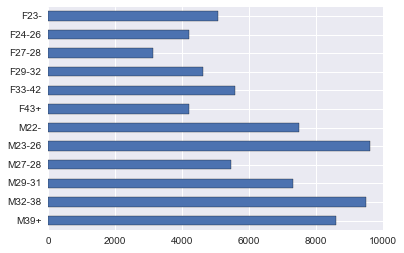

In [14]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='barh')

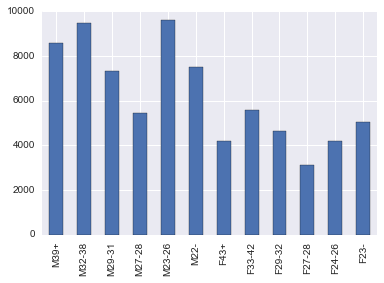

In [15]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='bar')

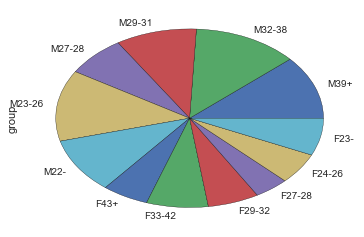

In [16]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='pie')

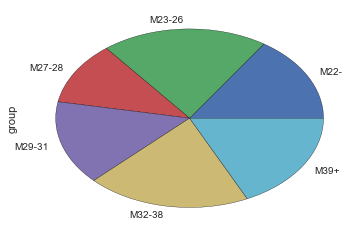

In [17]:
gatrain[gatrain['gender'] == 'M'].group.value_counts().sort_index().plot(kind='pie')

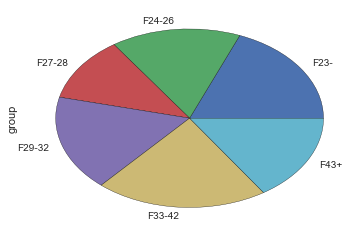

In [18]:
gatrain[gatrain['gender'] == 'F'].group.value_counts().sort_index().plot(kind='pie')

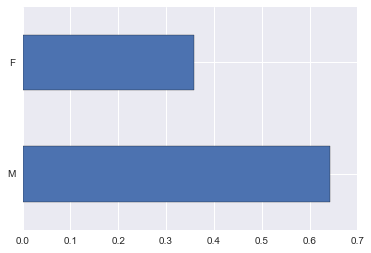

In [19]:
gatrain.gender.value_counts(normalize=True).plot(kind='barh')

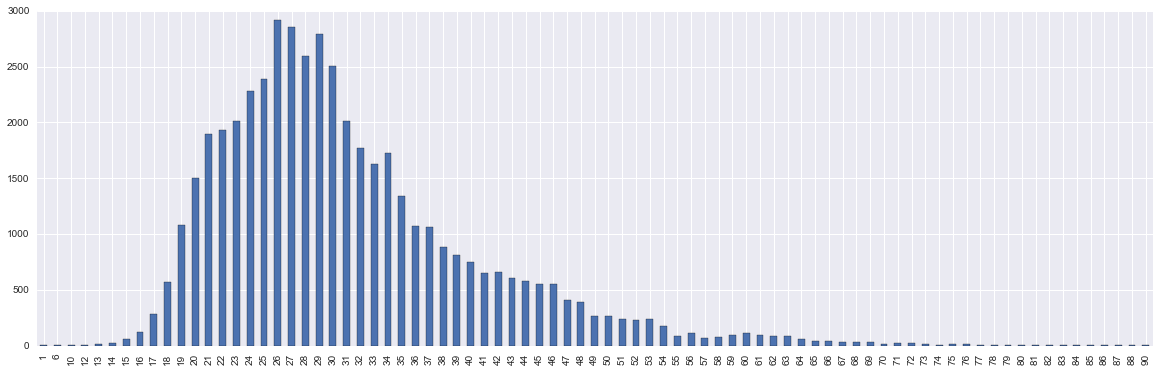

In [20]:
gatrain[gatrain.gender == 'M'].age.value_counts().sort_index().plot(kind='bar', figsize=(20, 6))

In [22]:
c = gatrain.groupby(['age','gender']).size().unstack(level=1).reindex(np.arange(gatrain.age.min(),gatrain.age.max())).fillna(0)
print(c.head())

gender    F    M
age             
1       0.0  1.0
2       0.0  0.0
3       0.0  0.0
4       0.0  0.0
5       0.0  0.0


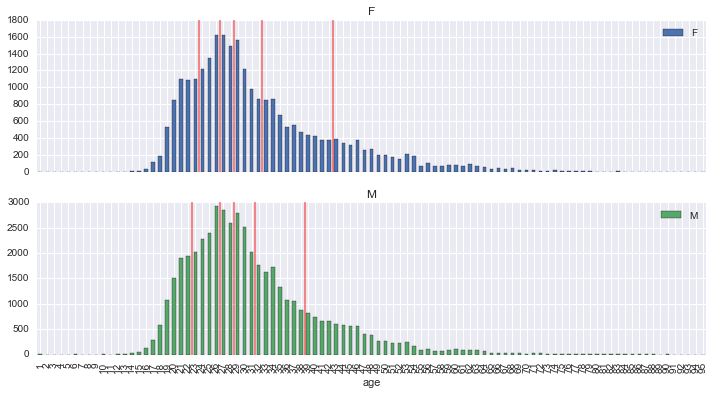

In [23]:
axes1, axes2 = c.plot(kind='bar', figsize=(12,6) , subplots=True)
axes1.vlines(np.array([23, 26, 28, 32, 42]) - 0.5, 0, 1800, color='r', alpha=0.5)
axes2.vlines(np.array([22, 26, 28, 31, 38]) - 0.5, 0, 3000, color='r', alpha=0.5)

### 1/n_classes benchmark

In [24]:
groupEncoder = LabelEncoder().fit(gatrain.group.values)
y = groupEncoder.transform(gatrain.group.values)
print(y)
print(groupEncoder.classes_)
n_clasess = len(groupEncoder.classes_)
print(n_clasess)

[10 10 10 ...,  6 10  7]
['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
12


In [25]:
print(gatrain.shape)
print(np.ones((1,12)))
preds = np.ones((gatrain.shape[0], n_clasess))
log_loss(y, preds)


(74645, 4)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


2.4849066497880012

### 1/n classes benchmark

In [26]:
print(len(gatrain.group.unique()))

groupEncoder = LabelEncoder().fit(gatrain.group.values)

y = groupEncoder.transform(gatrain.group.values)

print(y[0:3])
log_loss(y, np.ones((gatrain.shape[0], 12)))

12
[10 10 10]


2.4849066497880012

### class  probabilitie benchmark

best we can do without any features
Each fold is then used a validation set once while the k-1 remaining fold form the training set.
각각의 폴드들은 한번씩 검증 셋에 위치한다 나머지 다른 fold 들은 이때 training set 이된다

In [28]:
train = np.arange(1,100)
kf = KFold(9, n_folds=3)
for itrain, itest  in kf:
    print('@@')
    print('itrain' , itrain)
    print('itest' , itest)

@@
itrain [3 4 5 6 7 8]
itest [0 1 2]
@@
itrain [0 1 2 6 7 8]
itest [3 4 5]
@@
itrain [0 1 2 3 4 5]
itest [6 7 8]


In [29]:
print(gatrain.groupby('group').size())

group
F23-      5050
F24-26    4190
F27-28    3118
F29-32    4628
F33-42    5561
F43+      4194
M22-      7488
M23-26    9605
M27-28    5445
M29-31    7309
M32-38    9476
M39+      8581
dtype: int64


In [30]:
kf = KFold(gatrain.shape[0],n_folds=3, shuffle=True, random_state=0 )
pred = np.zeros((gatrain.shape[0], n_clasess))
for itrain, itest in kf:
    train = gatrain.iloc[itrain, :]
    pred[itest, :] = train.groupby('group').size()/train.shape[0]
print(log_loss(y, pred))

2.428094659


### Phone brand and model data

In [31]:
phone = pd.read_csv('./data/phone_brand_device_model.csv', encoding='utf-8')
print(phone.head(3))
print('nunique: ', phone.device_id.nunique())
print(phone.shape[0] - phone.device_id.nunique())
uphone = phone.drop_duplicates()

             device_id phone_brand device_model
0 -8890648629457979026          小米           红米
1  1277779817574759137          小米         MI 2
2  5137427614288105724          三星    Galaxy S4
nunique:  186716
529


In [32]:
print(phone.phone_brand.value_counts())

小米      43210
三星      34286
华为      32564
vivo    14395
OPPO    14289
魅族      11853
酷派       8407
联想       6761
金立       2768
HTC      2682
中兴       2096
乐视       1930
索尼       1821
努比亚      1144
LG        763
中国移动      671
TCL       586
朵唯        544
锤子        535
优米        492
海信        489
一加        438
语信        396
奇酷        378
天语        376
摩托罗拉      228
酷比        165
ZUK       153
酷比魔方      152
美图        151
        ...  
优语          5
欧乐迪         5
宝捷讯         4
天宏时代        4
本为          4
唯比          4
惠普          4
鲜米          3
大显          3
丰米          3
MIL         2
赛博宇华        2
凯利通         2
世纪星         2
原点          2
戴尔          2
恒宇丰         2
飞秒          2
ZOYE        1
德卡诺         1
瑞高          1
西门子         1
极米          1
欧乐酷         1
碟米          1
嘉源          1
宏碁          1
帷幄          1
亚马逊         1
E人E本        1
Name: phone_brand, dtype: int64


In [35]:
train_phone = pd.merge(gatrain, phone, on='device_id')
pbEncoder = LabelEncoder().fit(train_phone.phone_brand)
# print pbEncoder.classes_
train_phone['phone_brand_number'] = pbEncoder.transform(train_phone.phone_brand)

In [36]:
print(train_phone.head())

             device_id gender  age   group phone_brand device_model  \
0 -8076087639492063270      M   35  M32-38          小米         MI 2   
1 -2897161552818060146      M   35  M32-38          小米         MI 2   
2 -8260683887967679142      M   35  M32-38          小米         MI 2   
3 -4938849341048082022      M   30  M29-31          小米       红米note   
4   245133531816851882      M   30  M29-31          小米         MI 3   

   phone_brand_number  
0                  47  
1                  47  
2                  47  
3                  47  
4                  47  


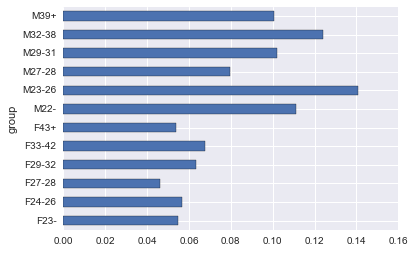

In [37]:
phone_47 = train_phone[train_phone.phone_brand_number == 47]
(phone_47.groupby('group').size()/phone_47.shape[0]).plot(kind='barh')

In [38]:
phone_47.groupby('gender').size()/phone_47.shape[0]

gender
F    0.342063
M    0.657937
dtype: float64

In [39]:
(phone_47.groupby('group').size()/phone_47.shape[0])

group
F23-      0.054569
F24-26    0.056587
F27-28    0.045916
F29-32    0.063336
F33-42    0.067720
F43+      0.053934
M22-      0.111271
M23-26    0.140748
M27-28    0.079545
M29-31    0.101869
M32-38    0.123846
M39+      0.100658
dtype: float64

In [40]:
train_phone.phone_brand_number.value_counts().head()

47    17336
14    13706
29    13001
6      5802
12     5658
Name: phone_brand_number, dtype: int64

In [41]:
phone_14 = train_phone[train_phone.phone_brand_number == 14]
(phone_14.groupby('group').size()/phone_14.shape[0])

group
F23-      0.049759
F24-26    0.055450
F27-28    0.043047
F29-32    0.074785
F33-42    0.099227
F43+      0.074858
M22-      0.062527
M23-26    0.103604
M27-28    0.070334
M29-31    0.096016
M32-38    0.140741
M39+      0.129651
dtype: float64

In [42]:
gb = train_phone.groupby(['group', 'phone_brand_number']).size().unstack().fillna(0)
gb

phone_brand_number,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
group,,,,,,,,,,,,,,,,,,,,,
F23-,2.0,56.0,8.0,0.0,4.0,0.0,741.0,0.0,1.0,17.0,...,9.0,1.0,1.0,0.0,0.0,0.0,0.0,326.0,0.0,3.0
F24-26,0.0,57.0,13.0,1.0,3.0,0.0,445.0,0.0,0.0,7.0,...,7.0,0.0,2.0,1.0,0.0,0.0,0.0,262.0,0.0,1.0
F27-28,2.0,31.0,17.0,0.0,1.0,0.0,299.0,0.0,2.0,6.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0,0.0,1.0
F29-32,0.0,55.0,21.0,2.0,2.0,0.0,429.0,0.0,0.0,10.0,...,15.0,0.0,2.0,1.0,0.0,0.0,2.0,202.0,0.0,1.0
F33-42,0.0,65.0,23.0,2.0,1.0,0.0,407.0,0.0,2.0,10.0,...,7.0,0.0,1.0,1.0,0.0,1.0,0.0,181.0,0.0,9.0
F43+,0.0,57.0,18.0,5.0,0.0,0.0,260.0,0.0,0.0,12.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,1.0
M22-,1.0,109.0,13.0,0.0,1.0,1.0,675.0,0.0,0.0,28.0,...,25.0,3.0,0.0,1.0,0.0,0.0,0.0,833.0,1.0,3.0
M23-26,0.0,149.0,61.0,3.0,0.0,0.0,712.0,1.0,0.0,31.0,...,33.0,1.0,2.0,0.0,0.0,0.0,0.0,947.0,0.0,0.0
M27-28,1.0,65.0,24.0,0.0,1.0,0.0,397.0,0.0,1.0,9.0,...,21.0,1.0,1.0,0.0,0.0,0.0,0.0,443.0,0.0,1.0


In [43]:
import math
ngb = (gb/gb.sum())
ngb

phone_brand_number,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
group,,,,,,,,,,,,,,,,,,,,,
F23-,0.2,0.055172,0.024024,0.000000,0.266667,0.0,0.127715,0.000000,0.166667,0.076577,...,0.047120,0.142857,0.083333,0.00,0.0,0.0,0.000000,0.069214,0.0,0.085714
F24-26,0.0,0.056158,0.039039,0.052632,0.200000,0.0,0.076698,0.000000,0.000000,0.031532,...,0.036649,0.000000,0.166667,0.25,0.0,0.0,0.000000,0.055626,0.0,0.028571
F27-28,0.2,0.030542,0.051051,0.000000,0.066667,0.0,0.051534,0.000000,0.333333,0.027027,...,0.036649,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.038004,0.0,0.028571
F29-32,0.0,0.054187,0.063063,0.105263,0.133333,0.0,0.073940,0.000000,0.000000,0.045045,...,0.078534,0.000000,0.166667,0.25,0.0,0.0,0.666667,0.042887,0.0,0.028571
F33-42,0.0,0.064039,0.069069,0.105263,0.066667,0.0,0.070148,0.000000,0.333333,0.045045,...,0.036649,0.000000,0.083333,0.25,0.0,1.0,0.000000,0.038429,0.0,0.257143
F43+,0.0,0.056158,0.054054,0.263158,0.000000,0.0,0.044812,0.000000,0.000000,0.054054,...,0.031414,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.033121,0.0,0.028571
M22-,0.1,0.107389,0.039039,0.000000,0.066667,1.0,0.116339,0.000000,0.000000,0.126126,...,0.130890,0.428571,0.000000,0.25,0.0,0.0,0.000000,0.176858,1.0,0.085714
M23-26,0.0,0.146798,0.183183,0.157895,0.000000,0.0,0.122716,0.333333,0.000000,0.139640,...,0.172775,0.142857,0.166667,0.00,0.0,0.0,0.000000,0.201062,0.0,0.000000
M27-28,0.1,0.064039,0.072072,0.000000,0.066667,0.0,0.068425,0.000000,0.166667,0.040541,...,0.109948,0.142857,0.083333,0.00,0.0,0.0,0.000000,0.094055,0.0,0.028571


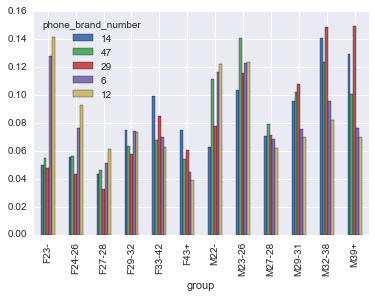

In [44]:
ngb[[14, 47, 29, 6, 12]].plot(kind='bar')


In [45]:
genderb = train_phone.groupby(['gender', 'phone_brand_number']).size().unstack().fillna(0)
genderb

phone_brand_number,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
gender,,,,,,,,,,,,,,,,,,,,,
F,4.0,321.0,100.0,10.0,11.0,0.0,2581.0,0.0,5.0,62.0,...,51.0,1.0,6.0,3.0,0.0,1.0,2.0,1306.0,0.0,16.0
M,6.0,694.0,233.0,9.0,4.0,1.0,3221.0,3.0,1.0,160.0,...,140.0,6.0,6.0,1.0,1.0,0.0,1.0,3404.0,1.0,19.0


In [ ]:
ngenderb = genderb/genderb.sum()
ngenderb[[14, 47, 29, 6, 12]].plot(kind='bar')

In [46]:
print('{} row'.format(phone.shape[0]))
print('unique values:')
for c in phone.columns:
    print('{}: {}'.format(c, phone[c].nunique()))

187245 row
unique values:
device_id: 186716
phone_brand: 131
device_model: 1599


### Duplicate device_ids

In [47]:
dup = phone.groupby('device_id').size()
dup = dup[dup > 1]
print(dup.head(3))
print(dup.shape)
print(dup.value_counts())

device_id
-9198513807097378193    2
-9194249084574705214    2
-9180330522697778980    2
dtype: int64
(529,)
2    529
dtype: int64


529 device ids have duplicate entries in phone dataframe. are duplicate rows identialcal or different?

In [48]:
dups = phone[phone.device_id.isin(dup.index)]
first = dups.groupby('device_id').first()
last = dups.groupby('device_id').last()
print(first.head(3))
print(last.head(3))

                     phone_brand device_model
device_id                                    
-9198513807097378193          酷派           F2
-9194249084574705214        vivo         Y29L
-9180330522697778980          华为     荣耀6 Plus
                     phone_brand device_model
device_id                                    
-9198513807097378193          酷派           F2
-9194249084574705214        vivo         Y29L
-9180330522697778980          华为     荣耀6 Plus


In [49]:
diff = (first != last).sum(axis=1).nonzero()
pd.concat((first.iloc[diff], last.iloc[diff]), axis=1)

,phone_brand,device_model,phone_brand,device_model
device_id,,,,
-7297178577997113203,华为,荣耀畅玩5X,华为,荣耀3C
-7059081542575379359,LG,Nexus 5,魅族,魅蓝Note 2
-6590454305031525112,小米,MI 3,华为,荣耀6 Plus
-5269721363279128080,三星,Galaxy Core Advance,小米,MI 3
-3004353610608679970,酷派,5891,酷派,7296
5245428108336915020,魅族,MX4,小米,MI One Plus


Look like 6 device with duplicate row shave different values for brand and model. are they in train or test?

In [51]:
dev =  _.index
print(dev)
print('in trian: {}'.format(sum(gatrain.device_id.isin(dev))))
print('in test: {}'.format(sum(gatest.device_id.isin(dev))))

Int64Index([-7297178577997113203, -7059081542575379359, -6590454305031525112,
            -5269721363279128080, -3004353610608679970,  5245428108336915020],
           dtype='int64', name='device_id')
in trian: 1
in test: 5


duplicate id exist at phone it is different dataset versus train, test

In [52]:
print(sum(gatest.device_id.isin(gatrain.device_id.unique())))
print(sum(gatrain.device_id.isin(gatest.device_id.unique())))

0
0


### Any models that can belong to different brands?

In [53]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)
c.value_counts()

1    1545
2      43
3       8
4       3
Name: phone_brand, dtype: int64

Some device model can belong to more than one brand. So the correct way to label encode device model is probably to concatenate with brand first

In [54]:
brandEncoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandEncoder.transform(phone.phone_brand)

In [55]:
phone['model'] = LabelEncoder().fit(phone.device_model).transform(phone.device_model)

In [56]:
phone.head(3)

,device_id,phone_brand,device_model,brand,model
0,-8890648629457979026,小米,红米,51,1517
1,1277779817574759137,小米,MI 2,51,749
2,5137427614288105724,三星,Galaxy S4,15,560


### Brands and models popularity

51    43210
15    34286
31    32564
Name: brand, dtype: int64
51     43210
15     77496
31    110060
Name: brand, dtype: int64
187245


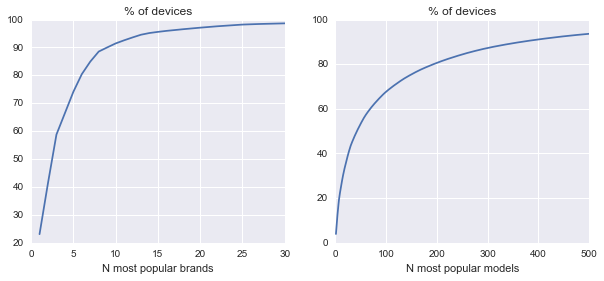

In [58]:
print(phone.brand.value_counts().head(3))
c = phone.brand.value_counts()
print(c.cumsum().head(3))
print( c.sum())
s = c.cumsum()/c.sum()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
ax1.plot(np.arange(s.shape[0]) + 1, s.values * 100)
ax1.set_xlim(0, 30)
ax1.set_xlabel('N most popular brands')
ax1.set_title('% of devices')

c = phone.model.value_counts()
s = c.cumsum() / c.sum()
ax2.plot(np.arange(s.shape[0]) + 1, s.values * 100)
ax2.set_xlim(0, 500)
ax2.set_xlabel('N most popular models')
ax2.set_title('% of devices')

9 most popluar brands account for 90% of devices. For model the number to account for 90% of device is 373. 

### Gender ratios by phone breands

In [ ]:
print(gatrain.head(3))
print(phone.head(3))

In [59]:
train = pd.merge(gatrain, phone[['device_id', 'brand', 'model']], on='device_id')
print(train.head(3))

             device_id gender  age   group  brand  model
0 -8076087639492063270      M   35  M32-38     51    749
1 -2897161552818060146      M   35  M32-38     51    749
2 -8260683887967679142      M   35  M32-38     51    749


In [60]:
train.groupby(['brand', 'gender']).size()

brand  gender
1      F            4
       M            6
2      F          321
       M          694
3      F          100
       M          233
4      F           10
       M            9
5      F           11
       M            4
6      M            1
7      F         2581
       M         3221
8      M            3
9      F            5
       M            1
10     F           62
       M          160
11     M            1
12     F            8
       M           48
13     F         2660
       M         2998
14     F           28
       M          146
15     F         5443
       M         8263
16     M            1
18     F          229
       M          632
                 ... 
114    F            2
       M           10
115    F           25
       M           42
116    F           28
       M           36
117    F         1079
       M         2270
118    F            5
       M           16
119    F            3
120    F          403
       M          721
121    F          

In [61]:
train = gatrain.merge(phone[['device_id', 'brand', 'model']], how='left', on='device_id')

In [64]:
perc = 0.95
c = train['brand'].value_counts().cumsum()/train.shape[0]
print(c.head(3))
take = c[c < perc].index
print(take)

51    0.231644
15    0.414784
31    0.588503
Name: brand, dtype: float64
Int64Index([51, 15, 31, 7, 13, 128, 117, 101, 120, 2, 18, 21, 96], dtype='int64')


change rare categories into 'other' 

In [65]:
gr = train['brand'].copy()
gr[~gr.isin(take)] = 'other';
gr.value_counts()

51       17336
15       13706
31       13001
7         5802
13        5658
128       4710
other     4105
117       3349
101       2695
120       1124
2         1015
18         861
21         760
96         717
Name: brand, dtype: int64

In [66]:
c = train.groupby([gr, 'gender']).size()
print(c.head(3))
c = c.unstack(level=1).fillna(0)
print(c.head(3))

brand  gender
2      F          321
       M          694
7      F         2581
dtype: int64
gender     F     M
brand             
2        321   694
7       2581  3221
13      2660  2998


In [67]:
total = c.sum(axis=1)
print(total)
meanprobs =  c.sum(axis=0).cumsum()/train.shape[0]

print(meanprobs)

brand
2         1015
7         5802
13        5658
15       13706
18         861
21         760
31       13001
51       17336
96         717
101       2695
117       3349
120       1124
128       4710
other     4105
dtype: int64
gender
F    0.358169
M    1.000000
dtype: float64


In [70]:
c.columns[int((c.shape[1]-1)/2)]
c = c.div(c.sum(axis=1), axis='index')
prnt(c.head(3))

gender         F         M
brand                     
2       0.316256  0.683744
7       0.444847  0.555153
13      0.470131  0.529869


In [71]:
c.cumsum(axis=1).sort_values(by='F')

gender,F,M
brand,,
21,0.263158,1.0
18,0.265970,1.0
128,0.277282,1.0
other,0.309866,1.0
2,0.316256,1.0
96,0.320781,1.0
117,0.322186,1.0
31,0.327436,1.0
101,0.331725,1.0


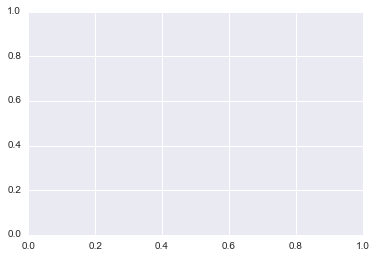

In [74]:
a.plt.subplot()